In [43]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
path='/content/drive/MyDrive/Dataset/walmart_data.csv'
df=pd.read_csv(path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [46]:
df.shape

(550068, 10)

In [47]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


Data set does not contain any null values.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


* From the above table only Purchase Column is continuous and rest all looks like categorical.

In [49]:
# changing data type of all the columns to categorical
for i in df.columns[:-1]:
  df[i]=df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [50]:
df.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933




1. User_ID- Out of 5,50,068 total count, there are 5,891 unique values which clearly indicates that same customer  are buying different products.
2. Product_ID-Out of 5,50,068 total count, there are 3,631 unique values which
indicates different customer buying same product with id P00265242 being most frequently ordered.
3. Gender- Nearly 75% of the total purchase are done by male, which indicates a significant difference in purchase behavior on black friday.
4. Age- Among the 7 unique bins of age groups, 26-35 have done the most transactions 2,19,587.
5. City_Category- Out of 3 categories, B is most frequent.
6. Stay_In_Current_City_Years- Customers who are currently staying in a city for 1 year have done the most transcations of 1,93,821.
7. Marital_Status- 59% of the customers are single and 41% are Married.


In [51]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


There is a significant variation in the amount of purchase with $12  being lowest and $23,961 being maximum. Mean is $9,264 which is greater than median purchase that is $8,047 which indicates that there is some higher purchasing amount pulling the mean value.

Text(21400.5, -0.045, 'UB: 21400.5')

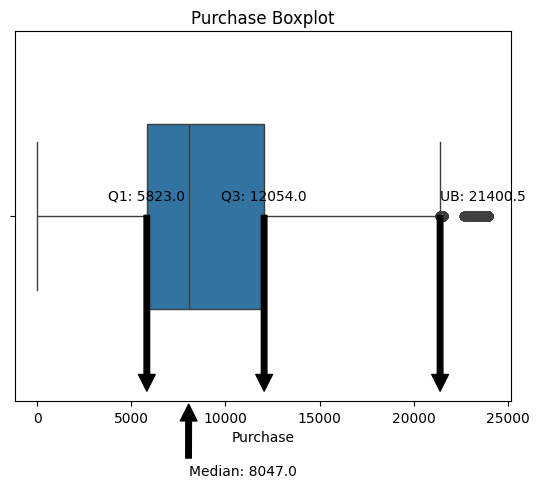

In [52]:
pur_box=sns.boxplot(x = df['Purchase'],vert = False,patch_artist = True,widths = 0.5)
pur_box.set_title('Purchase Boxplot')

# calculating the IQR
Q1 = df['Purchase'].quantile(0.25)
median=df['Purchase'].median()
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
UB=Q3+1.5*IQR

# annotating on the boxplot
plt.annotate(f'Q1: {Q1}', xy=(Q1, 0.5), xytext=(Q1,-0.045), arrowprops=dict(facecolor='black', shrink=0.05),ha='center')
plt.annotate(f'Median: {median}', xy=(median, 0.5), xytext=(median-10, 0.7), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'Q3: {Q3}', xy=(Q3, 0.5), xytext=(Q3, -0.045), arrowprops=dict(facecolor='black', shrink=0.05),ha='center')
plt.annotate(f'UB: {UB}', xy=(UB, 0.5), xytext=(UB, -0.045), arrowprops=dict(facecolor='black', shrink=0.05))

In [53]:
# Number of outliers
len(df[df['Purchase']>UB])

2677

* There are 2677 outliers, which is 0.48% of the total count of transactions.This shows a variability in spending behavior during sale.

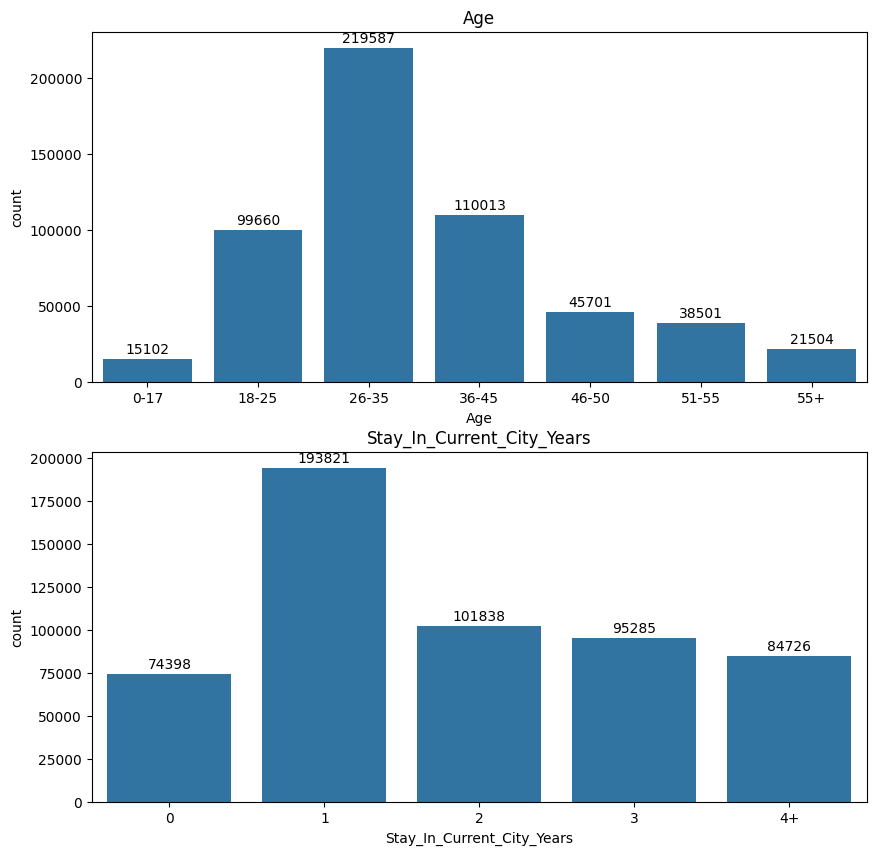

In [54]:
# Univariate analysis
fig, ax= plt.subplots(nrows=2, ncols=1, figsize=(10,10))
col=['Age','Stay_In_Current_City_Years']
if len(ax.shape) == 1:
  ax = ax.reshape(-1, 1)
c=0
for i in range (2):
  for j in range (1):
    sns.countplot(x=df[col[c]],ax=ax[i][j])
    ax[i][j].set_title(col[c])
    for p in ax[i][j].patches:
      ax[i][j].annotate( format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')
    c+=1

Age:-
* It is quite evident from the above chart that the age group **26-35** are the highest purchaser on black friday followed by age group **36-45** and **18-25** which suggest young and middle aged people are more interested in shopping on discounts and coupons.
* There is significant difference in the number of purchase from the rest of the age group (less than 10%) which suggests, wallmart should work on catering their requirements.

Stay_In_Current_City_Years:-
* From the chart it looks like customer staying in current city for 1 year are highest purchaser during black friday sale. It also means, new comers in any city are more inclined towards discounted shopping.
* **4+** year customer who are staying in the current city accounts lowest (almost 15%). So wallmart should work on increasing the counts of these customers.They are wallmart's loyal customer.
* We can also conclude that with increase in number of years stay in current city, number of customer decreases.

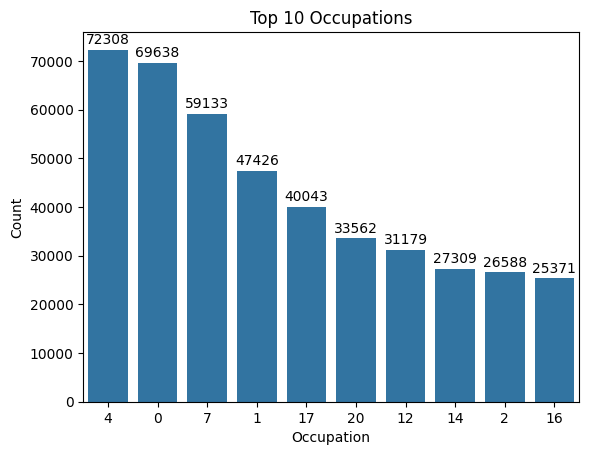

In [55]:
# Count the occurrences of each occupation
df_occ = df['Occupation'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 occupations
df_top10 = df[df['Occupation'].isin(df_occ)]

# Count plot for the top 10 occupations
ax=sns.countplot(x='Occupation', data=df_top10, order=df_occ)
plt.title('Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
for p in ax.patches:
      ax.annotate( format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')

* Customers with Occupation category 4,0 and 7 contributed significantly i.e. almost 37% of the total purchases suggesting that these occupations have a high demand for Walmart products or services.

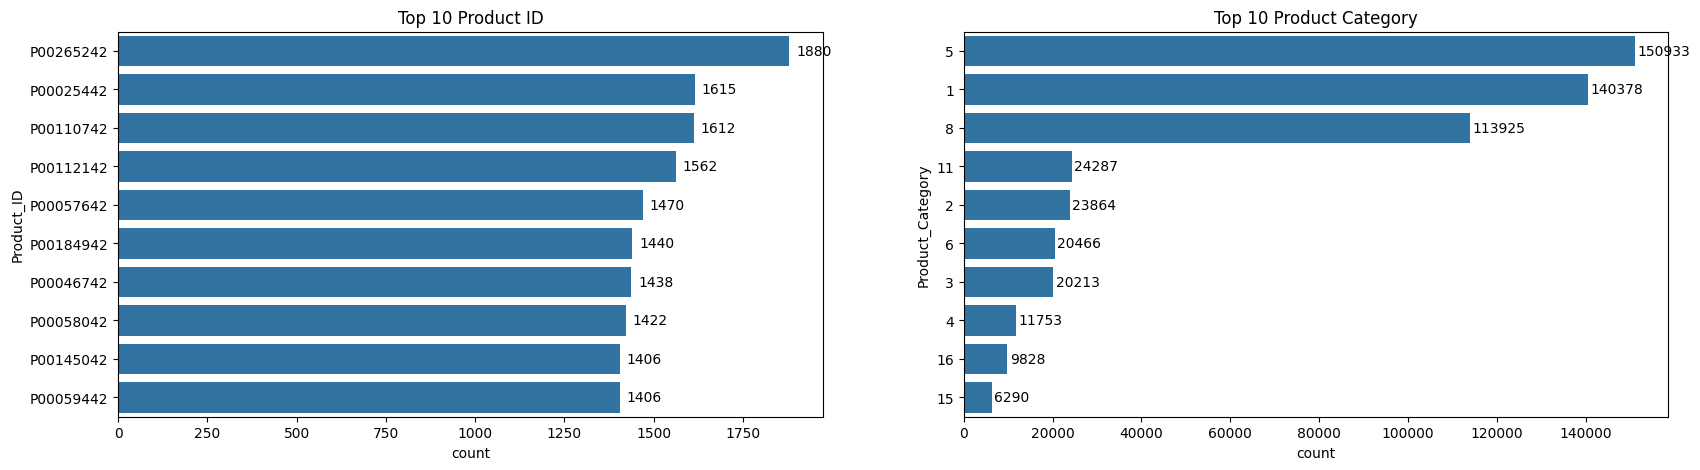

In [56]:
# Top 10 Products and Category
df_product_id=df['Product_ID'].value_counts().head(10).index
df_top10_prod=df[df['Product_ID'].isin(df_product_id)]

df_product_category=df['Product_Category'].value_counts().head(10).index
df_top10_prod_cat=df[df['Product_Category'].isin(df_product_category)]

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.countplot(y='Product_ID',data=df_top10_prod,order=df_product_id,ax=ax[0])
ax[0].set_title('Top 10 Product ID')
for p in ax[0].patches:
  ax[0].annotate( format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

sns.countplot(y='Product_Category',data=df_top10_prod_cat,order=df_product_category,ax=ax[1])
ax[1].set_title('Top 10 Product Category')
for p in ax[1].patches:
      ax[1].annotate( format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(2, 0), textcoords='offset points')

**Top 10 Product ID:** There is relatively small difference between top10 products which suggest the variety that wallmart offers is catering to many customers.

**Top 10 Product Category:** Top 3 product category almost accounts to 73% of the total count suggesting a strong preference for the category 5,1 and 8.

In [57]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

<ipython-input-58-924b440463d4>:22: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(x=col[c], y='Purchase', data=df,hue=col[c], ax=ax,palette=ocean_palette)
<ipython-input-58-924b440463d4>:22: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.boxplot(x=col[c], y='Purchase', data=df,hue=col[c], ax=ax,palette=ocean_palette)
<ipython-input-58-924b440463d4>:22: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.boxplot(x=col[c], y='Purchase', data=df,hue=col[c], ax=ax,palette=ocean_palette)
<ipython-input-58-924b440463d4>:22: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(x=col[c], y='Purchase', data=df,hue=col[c], ax=ax,palette=ocean_palette)


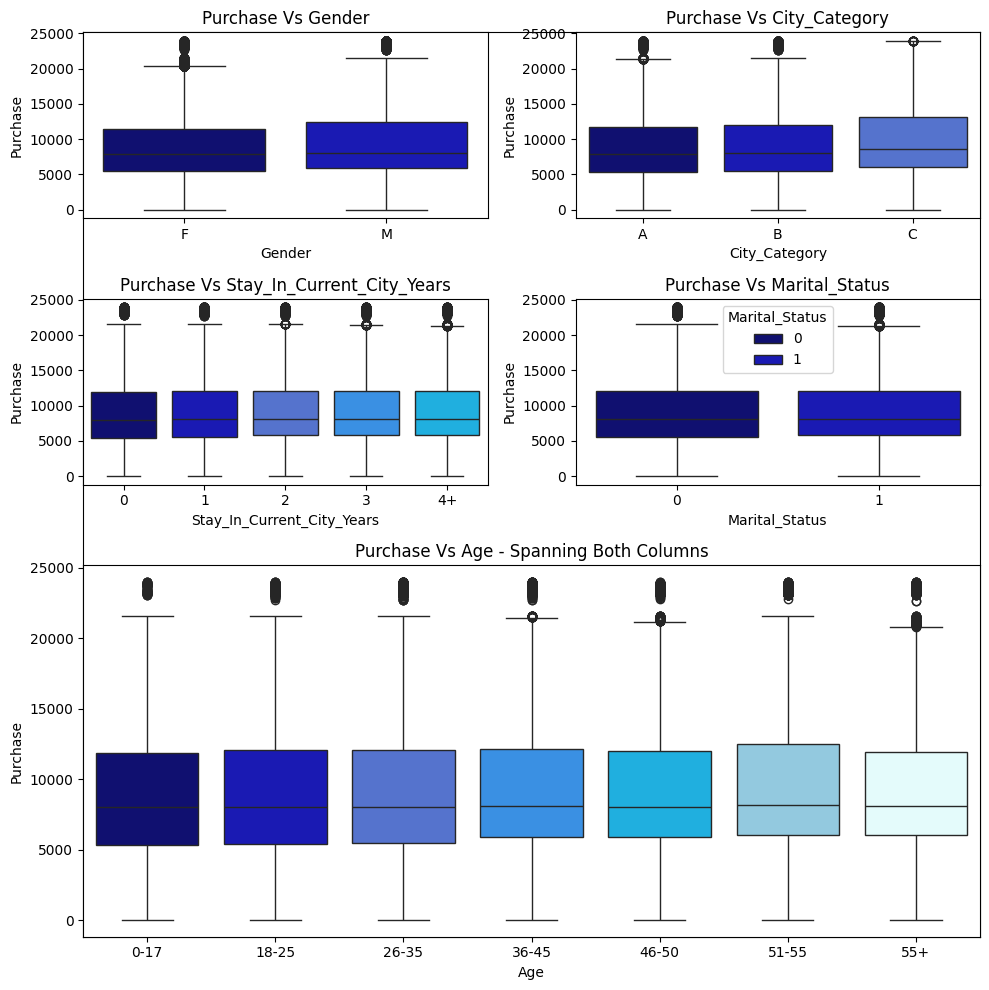

In [58]:
# Bivariate Analysis
import matplotlib.gridspec as gridspec
fig, ax=plt.subplots(figsize=(10,10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 2])
col=['Gender','City_Category','Stay_In_Current_City_Years','Marital_Status','Age']

# Hide the tick labels for the entire figure
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# First two plots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Custom Palette
ocean_palette = ["#000080", "#0000CD", "#4169E1", "#1E90FF", "#00BFFF", "#87CEEB", "#E0FFFF"]

# Plotting the first two columns
c = 0
for ax in [ax0, ax1, ax2, ax3]:
  sns.boxplot(x=col[c], y='Purchase', data=df,hue=col[c], ax=ax,palette=ocean_palette)
  ax.set_title(f'Purchase Vs {col[c]}')
  c += 1
# Last plot spanning both columns in the third row
ax4 = fig.add_subplot(gs[2, :])
sns.boxplot(x='Age', y='Purchase', data=df, ax=ax4,hue=col[c],palette=ocean_palette)
ax4.set_title('Purchase Vs Age - Spanning Both Columns')

plt.tight_layout()
plt.show()

- Irrespective of any categorical variable the median spending is consistent which is approximately  8000 dollars.

In [59]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [60]:
# mean of total transactions
df['Purchase'].mean()

9263.968712959126

**Gender Vs Purchase Amount**

In [61]:
# Genderwise mean
avg_m=df[df['Gender']=='M']['Purchase'].mean()
avg_f=df[df['Gender']=='F']['Purchase'].mean()
avg_m,avg_f

(9437.526040472265, 8734.565765155476)

In [62]:
# Transactions based on Gender
gender_wise_df=df['Gender'].value_counts().reset_index()
gender_wise_df['%']=round(gender_wise_df['count']/gender_wise_df['count'].sum()*100,2)
gender_wise_df

,Gender,count,%
0,M,414259,75.31
1,F,135809,24.69


* The average purchase amount per transactions for male is more than the average purchase amount overall and is more than that of females.
* In black friday sales total transaction by male is 3 times than that of female by percentage.

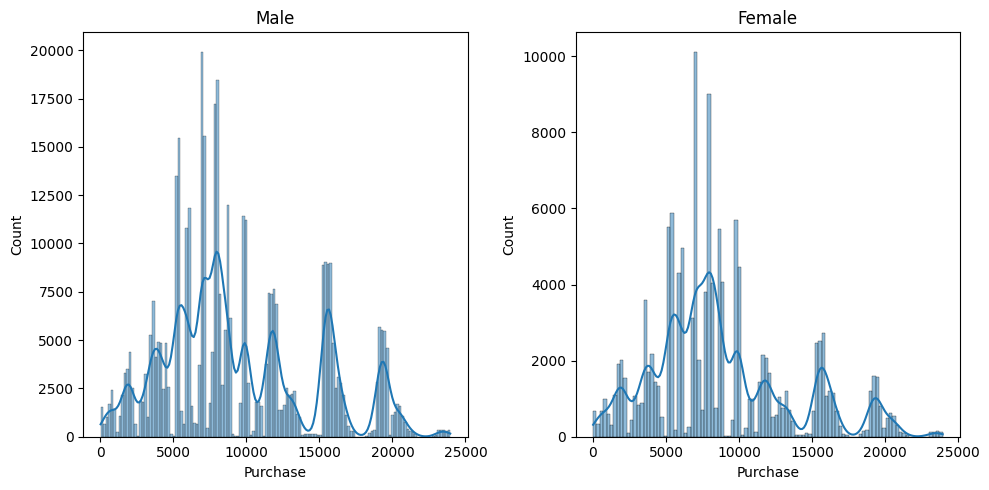

In [63]:
# Genderwise purchase transactions
male=df[df['Gender']=='M']['Purchase']
female=df[df['Gender']=='F']['Purchase']
l=[male,female]
titles=['Male','Female']
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,5))
c=0
for j in range (2):
    sns.histplot(data=l[c],ax=ax[j],kde=True)
    ax[j].set_title(titles[j])
    c+=1
plt.tight_layout()
plt.show()

* As we can see from the above chart, the transactions are not following the normal distribution suggesting the use of **Central Limit Theorem (CLT)**

In [64]:
# number of transactions genderwise
male.shape[0],female.shape[0]

(414259, 135809)

In [65]:
# mean of entire population genderwise (Male/Female)
round(avg_m,2),round(avg_f,2)

(9437.53, 8734.57)

In [66]:
# Trying different sample sizes (300,3,000,30,000) to see if the distribution tends to normal for male and female
# Male
sample_male_30=[np.mean(male.sample(30)) for _  in range (5000)]
sample_male_300=[np.mean(male.sample(300)) for _ in range (5000)]
sample_male_3000=[np.mean(male.sample(3000)) for _ in range (5000)]

# Female
sample_female_30=[np.mean(female.sample(30)) for _ in range (5000)]
sample_female_300=[np.mean(female.sample(300)) for _ in range (5000)]
sample_female_3000=[np.mean(female.sample(3000)) for _ in range (5000)]



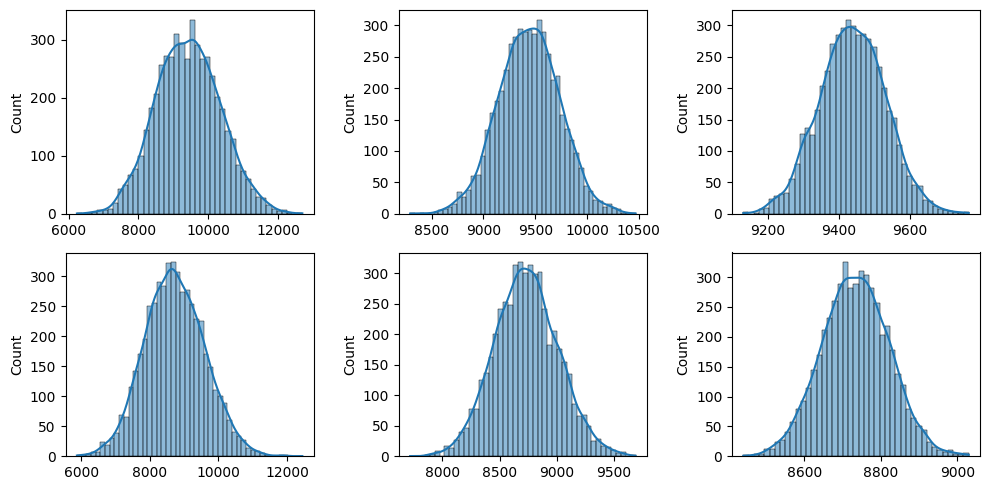

In [67]:
list_sample=[sample_male_30,sample_male_300,sample_male_3000,sample_female_30,sample_female_300,sample_female_3000]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
c=0
for i in range (2):
  for j in range (3):
    sns.histplot(data=list_sample[c],ax=ax[i][j],kde=True)
    #ax[i][j].set_title(list_sample[c])
    c+=1
plt.tight_layout()
plt.show()

* Both for male and female the distribution is almost normal for sample size **30,300 and 3000**

In [68]:
# comparison of statistics
# Male
# mean and standard deviation of entire population
mu_male=avg_m
sigma_male=df[df['Gender']=='M']['Purchase'].std()

# mean and standard deviation with sample size 30
mu_male_30=np.mean(sample_male_30)
sigma_male_30=np.std(sample_male_30)

# mean and standard deviation with sample size 300
mu_male_300=np.mean(sample_male_300)
sigma_male_300=np.std(sample_male_300)

# mean and standard deviation with sample size 3000
mu_male_3000=np.mean(sample_male_3000)
sigma_male_3000=np.std(sample_male_3000)

# Female
# mean and standard deviation of entire population
mu_female=avg_f
sigma_female=df[df['Gender']=='F']['Purchase'].std()

# mean and standard deviation with sample size 30
mu_female_30=np.mean(sample_female_30)
sigma_female_30=np.std(sample_female_30)

# mean and standard deviation with sample size 300
mu_female_300=np.mean(sample_female_300)
sigma_female_300=np.std(sample_female_300)

# mean and standard deviation with sample size 3000
mu_female_3000=np.mean(sample_female_3000)
sigma_female_3000=np.std(sample_female_3000)

print('MALE')
print(mu_male,mu_male_30,mu_male_300,mu_male_3000)
print(sigma_male,sigma_male_30,sigma_male_300,sigma_male_3000)
print('*'*70)
print('FEMALE')
print(mu_female,mu_female_30,mu_female_300,mu_female_3000)
print(sigma_female,sigma_female_30,sigma_female_300,sigma_female_3000)

MALE
9437.526040472265 9428.760033333332 9440.123001333333 9438.558570133333
5092.186209777949 919.5677086001994 294.05608286639017 93.06935136157584
**********************************************************************
FEMALE
8734.565765155476 8726.563773333333 8734.49514 8734.0771542
4767.233289291444 870.0475454204058 276.97150971865193 87.54285395194503


**Observations:**
1. Mean of the total transactions (i.e population) is almost same as sampling distributions for both male and female.
2. For both male and female as we increased the sampple size, SD for sampling distribution decreased.

In [69]:
# lets compute the 95% Confidence Interval
# Z-score @ 95% confidence level
#import scipy.stats as stats
from scipy.stats import norm
z1=norm.ppf(0.025)
z2=norm.ppf(1-0.025)

z1,z2

(-1.9599639845400545, 1.959963984540054)

In [70]:
# Calculating standard error
# MALE
# For n=30
SE_male_30=sigma_male/np.sqrt(30)

# For n=300
SE_male_300=sigma_male/np.sqrt(300)

# For n=3000
SE_male_3000=sigma_male/np.sqrt(3000)

#FEMALE
# For n=30
SE_female_30=sigma_female/np.sqrt(30)

# For n=300
SE_female_300=sigma_female/np.sqrt(300)

# For n=3000
SE_female_3000=sigma_female/np.sqrt(3000)

In [71]:
# Confidence Interval @ 95%
# For n=30
CI_Male_30=[round(mu_male+z1*SE_male_30,2),round(mu_male+z2*SE_male_30,2)]
CI_Female_30=[round(mu_female+z1*SE_female_30,2),round(mu_female+z2*SE_female_30,2)]

# For n=300
CI_Male_300=[round(mu_male+z1*SE_male_300,2),round(mu_male+z2*SE_male_300,2)]
CI_Female_300=[round(mu_female+z1*SE_female_300,2),round(mu_female+z2*SE_female_300,2)]

# For n=3000
CI_Male_3000=[round(mu_male+z1*SE_male_3000,2),round(mu_male+z2*SE_male_3000,2)]
CI_Female_3000=[round(mu_female+z1*SE_female_3000,2),round(mu_female+z2*SE_female_3000,2)]

CI_Summary={'Gender':['Male','Female'],
            'n=30':[CI_Male_30,CI_Female_30],
            'n=300':[CI_Male_300,CI_Female_300],
            'n=3000':[CI_Male_3000,CI_Female_3000]
            }
CI_Summary=pd.DataFrame(CI_Summary)
CI_Summary.set_index('Gender', inplace=True)
CI_Summary

,n=30,n=300,n=3000
Gender,,,
Male,"[7615.34, 11259.71]","[8861.3, 10013.75]","[9255.31, 9619.74]"
Female,"[7028.66, 10440.47]","[8195.11, 9274.02]","[8563.98, 8905.16]"


**Observations:**
* As the sample size increases, CI becomes narrower which implies large samples can give more reliable insights.
* With 95% confidence we can say that actual population mean for males lie between dollars 9255.31 and dollars 9619.84 and that of female lie between dollars 8563.98 and dollars 8905.16.
* Look at the Upper bound limit of both male and female, we can say men tends to spend more than female.

***Marital Status Vs Purchase Amount***

In [72]:
# Replacing 0 and 1 to Unmarried and Married respectively
df['Marital_Status']=df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df.head()

<ipython-input-72-6da5cadd3934>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Marital_Status']=df['Marital_Status'].replace({0:'Unmarried',1:'Married'})


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [73]:
# Marital Status wise mean
avg_u=df[df['Marital_Status']=='Unmarried']['Purchase'].mean()
avg_m=df[df['Marital_Status']=='Married']['Purchase'].mean()
avg_u,avg_m

(9265.907618921507, 9261.174574082374)

In [74]:
# Transactions based on Marital Status
Marital_Status_df=df['Marital_Status'].value_counts().reset_index()
Marital_Status_df['%']=round(Marital_Status_df['count']/Marital_Status_df['count'].sum()*100,2)
Marital_Status_df

,Marital_Status,count,%
0,Unmarried,324731,59.03
1,Married,225337,40.97


* The average spend during **Black Friday** per transactions for both unmarried and married is almost same (9266 Vs 9262).
* By percent of total transactions, unmarried accounts more  than married by 18%.

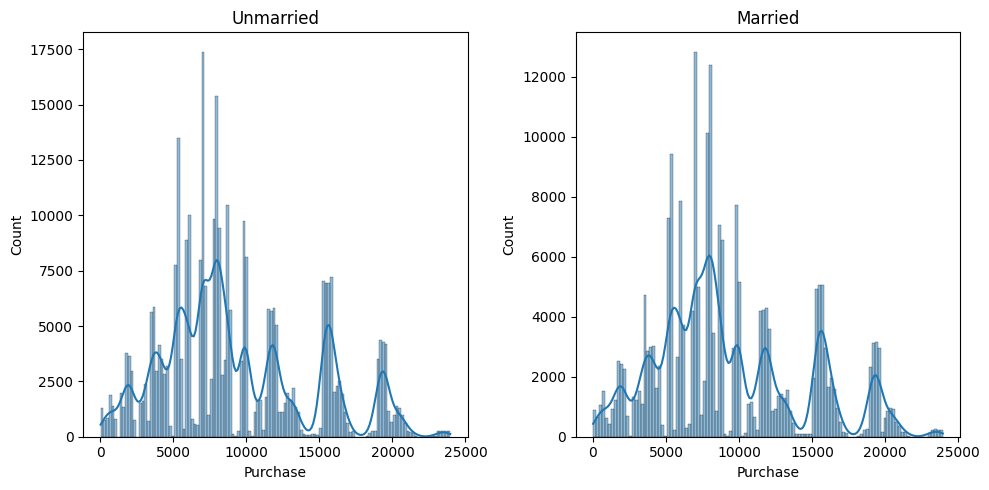

In [75]:
# Marital Status wise purchase transactions distribution
unmarried=df[df['Marital_Status']=='Unmarried']['Purchase']
married=df[df['Marital_Status']=='Married']['Purchase']
l=[unmarried,married]
titles=['Unmarried','Married']
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,5))
c=0
for j in range (2):
    sns.histplot(data=l[c],ax=ax[j],kde=True)
    ax[j].set_title(titles[j])
    c+=1
plt.tight_layout()
plt.show()

* The purchase amount for both unmarried and married is not normally distributed.

In [76]:
# number of transactions marital status wise
unmarried.shape[0],married.shape[0]

(324731, 225337)

In [77]:
# mean of entire population marital status wise (Unmarried/Married)
round(avg_u,2),round(avg_m,2)

(9265.91, 9261.17)

In [78]:
# Trying different sample sizes (30,300,3000) to see if the distribution tends to normal for unmarried and married
# Unmarried
sample_unmarried_30=[np.mean(unmarried.sample(30)) for _  in range (10000)]
sample_unmarried_300=[np.mean(unmarried.sample(300)) for _ in range (10000)]
sample_unmarried_3000=[np.mean(unmarried.sample(3000)) for _ in range (10000)]

# Married
sample_married_30=[np.mean(married.sample(30)) for _ in range (10000)]
sample_married_300=[np.mean(married.sample(300)) for _ in range (10000)]
sample_married_3000=[np.mean(married.sample(3000)) for _ in range (10000)]


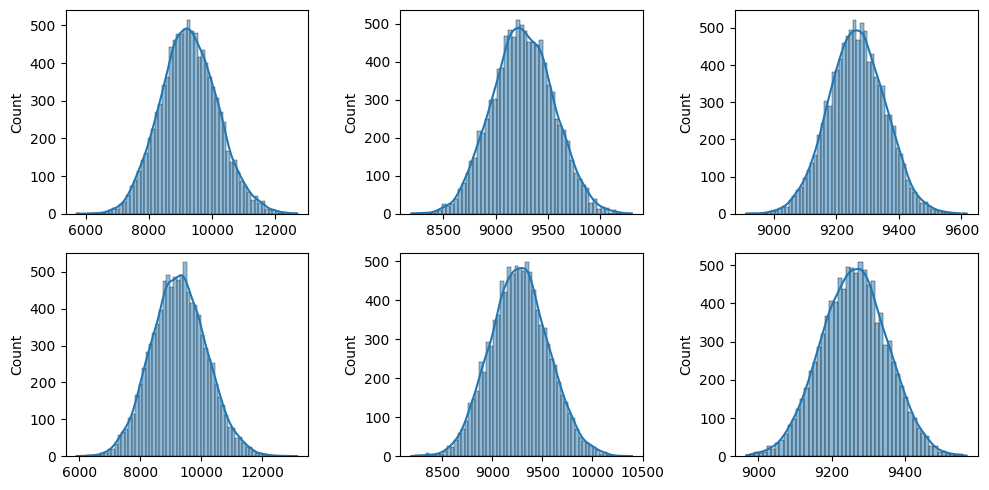

In [79]:
list_sample=[sample_unmarried_30,sample_unmarried_300,sample_unmarried_3000,sample_married_30,sample_married_300,sample_married_3000]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
c=0
for i in range (2):
  for j in range (3):
    sns.histplot(data=list_sample[c],ax=ax[i][j],kde=True)
    #ax[i][j].set_title(list_sample[c])
    c+=1
plt.tight_layout()
plt.show()

* Both for unmarried and married, sample distributions looks almost normally distributed.

In [80]:
# comparison of statistics
# Unmarried
# mean and standard deviation of entire population
mu_unmarried=avg_u
sigma_unmarried=df[df['Marital_Status']=='Unmarried']['Purchase'].std()

# mean and standard deviation with sample size 30
mu_unmarried_30=np.mean(sample_unmarried_30)
sigma_unmarried_30=np.std(sample_unmarried_30)

# mean and standard deviation with sample size 300
mu_unmarried_300=np.mean(sample_unmarried_300)
sigma_unmarried_300=np.std(sample_unmarried_300)

# mean and standard deviation with sample size 3000
mu_unmarried_3000=np.mean(sample_unmarried_3000)
sigma_unmarried_3000=np.std(sample_unmarried_3000)

# Married
# mean and standard deviation of entire population
mu_married=avg_m
sigma_married=df[df['Marital_Status']=='Married']['Purchase'].std()

# mean and standard deviation with sample size 30
mu_married_30=np.mean(sample_married_30)
sigma_married_30=np.std(sample_married_30)

# mean and standard deviation with sample size 300
mu_married_300=np.mean(sample_married_300)
sigma_married_300=np.std(sample_married_300)

# mean and standard deviation with sample size 3000
mu_married_3000=np.mean(sample_married_3000)
sigma_married_3000=np.std(sample_married_3000)

print('UNMARRIED')
print(mu_unmarried,mu_unmarried_30,mu_unmarried_300,mu_unmarried_3000)
print(sigma_unmarried,sigma_unmarried_30,sigma_unmarried_300,sigma_unmarried_3000)
print('*'*70)
print('MARRIED')
print(mu_married,mu_married_30,mu_married_300,mu_married_3000)
print(sigma_married,sigma_married_30,sigma_married_300,sigma_married_3000)

UNMARRIED
9265.907618921507 9267.655016666666 9261.774001666667 9265.453307633334
5027.347858674457 909.5878479158384 292.82929867676796 91.14178009465968
**********************************************************************
MARRIED
9261.174574082374 9269.460983333332 9269.493125333333 9261.7332193
5016.89737779313 906.2736193850985 290.633608438913 90.46307817720127


**Observations:**
1. Mean of the total transactions (i.e population) is almost same as sampling distributions for both unmarried and married.
2. For both unmarried and married as we increased the sample size, SD for sampling distribution decreased.

In [81]:
# lets compute the 95% Confidence Interval
# Z-score @ 95% confidence level
#import scipy.stats as stats
from scipy.stats import norm
z1=norm.ppf(0.025)
z2=norm.ppf(1-0.025)

z1,z2

(-1.9599639845400545, 1.959963984540054)

In [82]:
# Calculating standard error
# UNMARRIED
# For n=30
SE_unmarried_30=sigma_unmarried/np.sqrt(30)

# For n=300
SE_unmarried_300=sigma_unmarried/np.sqrt(300)

# For n=3000
SE_unmarried_3000=sigma_unmarried/np.sqrt(3000)

# MARRIED
# For n=30
SE_married_30=sigma_married/np.sqrt(30)

# For n=300
SE_married_300=sigma_married/np.sqrt(300)

# For n=3000
SE_married_3000=sigma_married/np.sqrt(3000)

In [83]:
# Confidence Interval @ 95%
# For n=30
CI_Unmarried_30=[round(mu_unmarried+z1*SE_unmarried_30,2),round(mu_unmarried+z2*SE_unmarried_30,2)]
CI_Married_30=[round(mu_married+z1*SE_married_30,2),round(mu_married+z2*SE_married_30,2)]

# For n=300
CI_Unmarried_300=[round(mu_unmarried+z1*SE_unmarried_300,2),round(mu_unmarried+z2*SE_unmarried_300,2)]
CI_Married_300=[round(mu_married+z1*SE_married_300,2),round(mu_married+z2*SE_married_300,2)]

# For n=3000
CI_Unmarried_3000=[round(mu_unmarried+z1*SE_unmarried_3000,2),round(mu_unmarried+z2*SE_unmarried_3000,2)]
CI_Married_3000=[round(mu_married+z1*SE_married_3000,2),round(mu_married+z2*SE_married_3000,2)]

CI_Summary={'Gender':['Unmarried','Married'],
            'n=30':[CI_Unmarried_30,CI_Married_30],
            'n=300':[CI_Unmarried_300,CI_Married_300],
            'n=3000':[CI_Unmarried_3000,CI_Married_3000]
            }
CI_Summary=pd.DataFrame(CI_Summary)
CI_Summary.set_index('Gender', inplace=True)
CI_Summary

,n=30,n=300,n=3000
Gender,,,
Unmarried,"[7466.93, 11064.89]","[8697.02, 9834.8]","[9086.01, 9445.81]"
Married,"[7465.93, 11056.42]","[8693.47, 9828.88]","[9081.65, 9440.7]"


**Observations:**
* As the sample size increases, CI becomes narrower which implies large samples can give more reliable insights.
* With 95% confidence we can say that actual population mean for unmarried lie between dollars 9086.01 and dollars 9445.81 and that of married lie between dollars 9081.65 and dollars 9440.7.
* Look at the Upper bound limit of both unmarried and married, we can say both tends to spend the same.

***Customer Age Vs Purchase Amount***

In [89]:
# customer age range mean
avg_1=df[df['Age']=='0-17']['Purchase'].mean()
avg_2=df[df['Age']=='18-25']['Purchase'].mean()
avg_3=df[df['Age']=='26-35']['Purchase'].mean()
avg_4=df[df['Age']=='36-45']['Purchase'].mean()
avg_5=df[df['Age']=='46-50']['Purchase'].mean()
avg_6=df[df['Age']=='51-55']['Purchase'].mean()
avg_7=df[df['Age']=='55+']['Purchase'].mean()
avg_1,avg_2,avg_3,avg_4,avg_5,avg_6,avg_7

(8933.464640444974,
 9169.663606261289,
 9252.690632869888,
 9331.350694917874,
 9208.625697468327,
 9534.808030960236,
 9336.280459449405)

In [90]:
# Transaction  based on different age range
Age_df=df['Age'].value_counts().reset_index()
Age_df['%']=round(Age_df['count']/Age_df['count'].sum()*100,2)
Age_df

,Age,count,%
0,26-35,219587,39.92
1,36-45,110013,20.00
2,18-25,99660,18.12
3,46-50,45701,8.31
4,51-55,38501,7.00
5,55+,21504,3.91
6,0-17,15102,2.75


* The Age group 0-17 is lowest to only 2.75% rightly suggesting that they cant purchase because of lack of purchasing power.
* The age group 18-45 accounts to 78% of total transactions suggesting **Black Friday** sales is popular among this age gorup.

IndexError: list index out of range

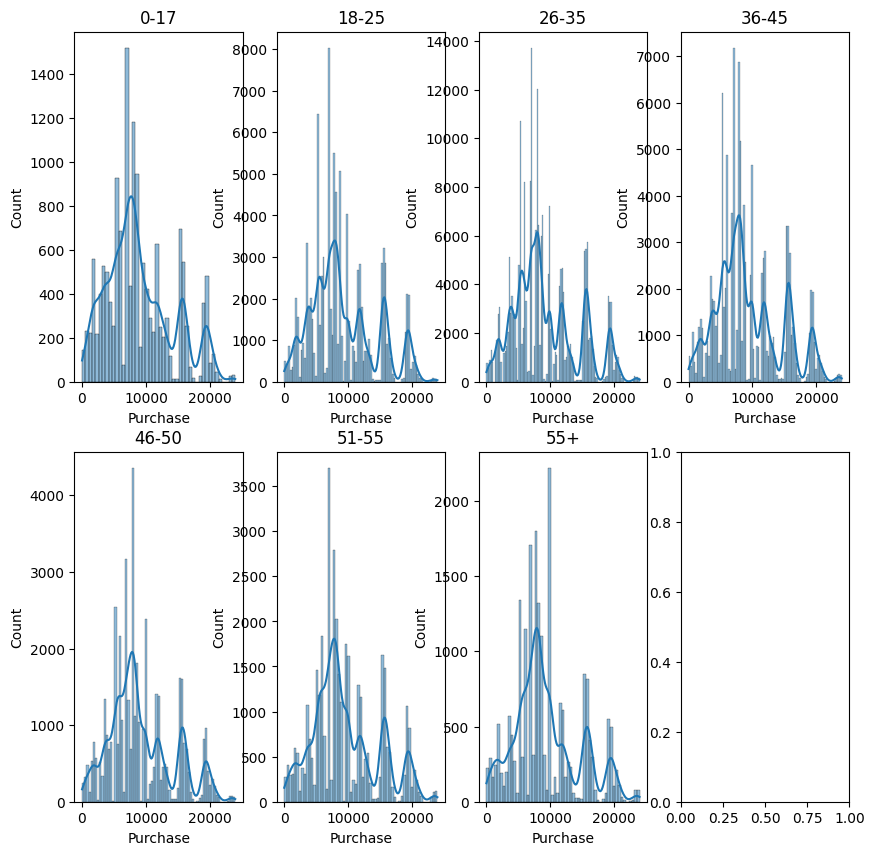

In [100]:
# purchase transactions distribution by age range
bin_1=df[df['Age']=='0-17']['Purchase']
bin_2=df[df['Age']=='18-25']['Purchase']
bin_3=df[df['Age']=='26-35']['Purchase']
bin_4=df[df['Age']=='36-45']['Purchase']
bin_5=df[df['Age']=='46-50']['Purchase']
bin_6=df[df['Age']=='51-55']['Purchase']
bin_7=df[df['Age']=='55+']['Purchase']
l=[bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7]
titles=['0-17','18-25','26-35','36-45','46-50','51-55','55+']
fig, ax= plt.subplots(nrows=2, ncols=4, figsize=(10,10))
c=0
for i in range (2):
  for j in range (4):
    sns.histplot(data=l[c],ax=ax[i][j],kde=True)
    ax[i][j].set_title(titles[c])
    c+=1
plt.tight_layout()
plt.show()

* None of the age groups follow normal distribution.

In [101]:
# Trying different sample sizes (30,300,3000) to see if the distribution tends to normal for different age groups
# 0-17
sample_bin_1_30=[np.mean(bin_1.sample(30)) for _  in range (5000)]
sample_bin_1_300=[np.mean(bin_1.sample(300)) for _ in range (5000)]
sample_bin_1_3000=[np.mean(bin_1.sample(3000)) for _ in range (5000)]

# 18-25
sample_bin_2_30=[np.mean(bin_2.sample(30)) for _  in range (5000)]
sample_bin_2_300=[np.mean(bin_2.sample(300)) for _ in range (5000)]
sample_bin_2_3000=[np.mean(bin_2.sample(3000)) for _ in range (5000)]

# 26-35
sample_bin_3_30=[np.mean(bin_3.sample(30)) for _  in range (5000)]
sample_bin_3_300=[np.mean(bin_3.sample(300)) for _ in range (5000)]
sample_bin_3_3000=[np.mean(bin_3.sample(3000)) for _ in range (5000)]

# 36-45
sample_bin_4_30=[np.mean(bin_4.sample(30)) for _  in range (5000)]
sample_bin_4_300=[np.mean(bin_4.sample(300)) for _ in range (5000)]
sample_bin_4_3000=[np.mean(bin_4.sample(3000)) for _ in range (5000)]

# 46-50
sample_bin_5_30=[np.mean(bin_5.sample(30)) for _  in range (5000)]
sample_bin_5_300=[np.mean(bin_5.sample(300)) for _ in range (5000)]
sample_bin_5_3000=[np.mean(bin_5.sample(3000)) for _ in range (5000)]

# 51-55
sample_bin_6_30=[np.mean(bin_6.sample(30)) for _  in range (5000)]
sample_bin_6_300=[np.mean(bin_6.sample(300)) for _ in range (5000)]
sample_bin_6_3000=[np.mean(bin_6.sample(3000)) for _ in range (5000)]

# 55+
sample_bin_7_30=[np.mean(bin_7.sample(30)) for _  in range (5000)]
sample_bin_7_300=[np.mean(bin_7.sample(300)) for _ in range (5000)]
sample_bin_7_3000=[np.mean(bin_7.sample(3000)) for _ in range (5000)]


In [104]:
# comparison of statistics
# mean and standard deviation of entire population
mu_1=avg_1
sigma_1=df[df['Age']=='0-17']['Purchase'].std()

mu_2=avg_2
sigma_2=df[df['Age']=='18-25']['Purchase'].std()

mu_3=avg_3
sigma_3=df[df['Age']=='26-35']['Purchase'].std()

mu_4=avg_4
sigma_4=df[df['Age']=='36-45']['Purchase'].std()

mu_5=avg_5
sigma_5=df[df['Age']=='46-50']['Purchase'].std()

mu_6=avg_6
sigma_6=df[df['Age']=='51-55']['Purchase'].std()

mu_7=avg_7
sigma_7=df[df['Age']=='55+']['Purchase'].std()

# mean and standard deviation with sample size 30
mu_bin_1_30=np.mean(sample_bin_1_30)
sigma_bin_1_30=np.std(sample_bin_1_30)

mu_bin_2_30=np.mean(sample_bin_2_30)
sigma_bin_2_30=np.std(sample_bin_2_30)

mu_bin_3_30=np.mean(sample_bin_3_30)
sigma_bin_3_30=np.std(sample_bin_3_30)

mu_bin_4_30=np.mean(sample_bin_4_30)
sigma_bin_4_30=np.std(sample_bin_4_30)

mu_bin_5_30=np.mean(sample_bin_5_30)
sigma_bin_5_30=np.std(sample_bin_5_30)

mu_bin_6_30=np.mean(sample_bin_6_30)
sigma_bin_6_30=np.std(sample_bin_6_30)

mu_bin_7_30=np.mean(sample_bin_7_30)
sigma_bin_7_30=np.std(sample_bin_7_30)

# mean and standard deviation with sample size 300
mu_bin_1_300=np.mean(sample_bin_1_300)
sigma_bin_1_300=np.std(sample_bin_1_300)

mu_bin_2_300=np.mean(sample_bin_2_300)
sigma_bin_2_300=np.std(sample_bin_2_300)

mu_bin_3_300=np.mean(sample_bin_3_300)
sigma_bin_3_300=np.std(sample_bin_3_300)

mu_bin_4_300=np.mean(sample_bin_4_300)
sigma_bin_4_300=np.std(sample_bin_4_300)

mu_bin_5_300=np.mean(sample_bin_5_300)
sigma_bin_5_300=np.std(sample_bin_5_300)

mu_bin_6_300=np.mean(sample_bin_6_300)
sigma_bin_6_300=np.std(sample_bin_6_300)

mu_bin_7_300=np.mean(sample_bin_7_300)
sigma_bin_7_300=np.std(sample_bin_7_300)

# mean and standard deviation with sample size 3000
mu_bin_1_3000=np.mean(sample_bin_1_3000)
sigma_bin_1_3000=np.std(sample_bin_1_3000)

mu_bin_2_3000=np.mean(sample_bin_2_3000)
sigma_bin_2_3000=np.std(sample_bin_2_3000)

mu_bin_3_3000=np.mean(sample_bin_3_3000)
sigma_bin_3_3000=np.std(sample_bin_3_3000)

mu_bin_4_3000=np.mean(sample_bin_4_3000)
sigma_bin_4_3000=np.std(sample_bin_4_3000)

mu_bin_5_3000=np.mean(sample_bin_5_3000)
sigma_bin_5_3000=np.std(sample_bin_5_3000)

mu_bin_6_3000=np.mean(sample_bin_6_3000)
sigma_bin_6_3000=np.std(sample_bin_6_3000)

mu_bin_7_3000=np.mean(sample_bin_7_3000)
sigma_bin_7_3000=np.std(sample_bin_7_3000)


print('0-17')
print(mu_1,mu_bin_1_30,mu_bin_1_300,mu_bin_1_3000)
print(sigma_1,sigma_bin_1_30,sigma_bin_1_300,sigma_bin_1_3000)
print('*'*70)
print('18-25')
print(mu_2,mu_bin_2_30,mu_bin_2_300,mu_bin_2_3000)
print(sigma_2,sigma_bin_2_30,sigma_bin_2_300,sigma_bin_2_3000)
print('*'*70)
print('26-35')
print(mu_3,mu_bin_3_30,mu_bin_3_300,mu_bin_3_3000)
print(sigma_3,sigma_bin_3_30,sigma_bin_3_300,sigma_bin_3_3000)
print('*'*70)
print('36-45')
print(mu_4,mu_bin_4_30,mu_bin_4_300,mu_bin_4_3000)
print(sigma_4,sigma_bin_4_30,sigma_bin_4_300,sigma_bin_4_3000)
print('*'*70)
print('46-50')
print(mu_5,mu_bin_5_30,mu_bin_5_300,mu_bin_5_3000)
print(sigma_5,sigma_bin_5_30,sigma_bin_5_300,sigma_bin_5_3000)
print('*'*70)
print('51-55')
print(mu_6,mu_bin_6_30,mu_bin_6_300,mu_bin_6_3000)
print(sigma_6,sigma_bin_6_30,sigma_bin_6_300,sigma_bin_6_3000)
print('*'*70)
print('55+')
print(mu_7,mu_bin_7_30,mu_bin_7_300,mu_bin_7_3000)
print(sigma_7,sigma_bin_7_30,sigma_bin_7_300,sigma_bin_7_3000)
print('*'*70)

0-17
8933.464640444974 8961.82592 8935.160842 8932.688756533335
5111.11404600277 936.3128336043214 289.50630362449783 82.78042817306496
**********************************************************************
18-25
9169.663606261289 9200.195513333334 9168.819305333333 9169.090985133333
5034.321997176577 912.3788993147302 286.6991308673988 89.93221955818912
**********************************************************************
26-35
9252.690632869888 9247.022633333332 9253.676551333334 9252.909586400001
5010.527303002927 907.8114806624893 285.3784544130868 91.03112824488115
**********************************************************************
36-45
9331.350694917874 9340.417233333334 9325.98786 9333.138060933334
5022.923879204652 922.7720798921952 290.0498928980062 90.85569045071507
**********************************************************************
46-50
9208.625697468327 9209.48576 9206.96813 9211.157994866666
4967.216367142921 919.0568724875277 283.85717590106395 86.50894842266536


In [105]:
# lets compute the 95% Confidence Interval
# Z-score @ 95% confidence level
#import scipy.stats as stats
from scipy.stats import norm
z1=norm.ppf(0.025)
z2=norm.ppf(1-0.025)

z1,z2

(-1.9599639845400545, 1.959963984540054)

In [106]:
# Calculating standard error
# 0-17
# For n=30
SE_bin_1_30=sigma_1/np.sqrt(30)
# For n=300
SE_bin_1_300=sigma_1/np.sqrt(300)
# For n=3000
SE_bin_1_3000=sigma_1/np.sqrt(3000)

# 18-25
# For n=30
SE_bin_2_30=sigma_2/np.sqrt(30)
# For n=300
SE_bin_2_300=sigma_2/np.sqrt(300)
# For n=3000
SE_bin_2_3000=sigma_2/np.sqrt(3000)

# 26-35
# For n=30
SE_bin_3_30=sigma_3/np.sqrt(30)
# For n=300
SE_bin_3_300=sigma_3/np.sqrt(300)
# For n=3000
SE_bin_3_3000=sigma_3/np.sqrt(3000)

# 36-45
# For n=30
SE_bin_4_30=sigma_4/np.sqrt(30)
# For n=300
SE_bin_4_300=sigma_4/np.sqrt(300)
# For n=3000
SE_bin_4_3000=sigma_4/np.sqrt(3000)

# 46-50
# For n=30
SE_bin_5_30=sigma_5/np.sqrt(30)
# For n=300
SE_bin_5_300=sigma_5/np.sqrt(300)
# For n=3000
SE_bin_5_3000=sigma_5/np.sqrt(3000)

# 51-55
# For n=30
SE_bin_6_30=sigma_6/np.sqrt(30)
# For n=300
SE_bin_6_300=sigma_6/np.sqrt(300)
# For n=3000
SE_bin_6_3000=sigma_6/np.sqrt(3000)

# 55+
# For n=30
SE_bin_7_30=sigma_7/np.sqrt(30)
# For n=300
SE_bin_7_300=sigma_7/np.sqrt(300)
# For n=3000
SE_bin_7_3000=sigma_7/np.sqrt(3000)

In [108]:
# Confidence Interval @ 95%
# For n=30
CI_bin_1_30=[round(mu_1+z1*SE_bin_1_30,2),round(mu_1+z2*SE_bin_1_30,2)]
CI_bin_2_30=[round(mu_2+z1*SE_bin_2_30,2),round(mu_2+z2*SE_bin_2_30,2)]
CI_bin_3_30=[round(mu_3+z1*SE_bin_3_30,2),round(mu_3+z2*SE_bin_3_30,2)]
CI_bin_4_30=[round(mu_4+z1*SE_bin_4_30,2),round(mu_4+z2*SE_bin_4_30,2)]
CI_bin_5_30=[round(mu_5+z1*SE_bin_5_30,2),round(mu_5+z2*SE_bin_5_30,2)]
CI_bin_6_30=[round(mu_6+z1*SE_bin_6_30,2),round(mu_6+z2*SE_bin_6_30,2)]
CI_bin_7_30=[round(mu_7+z1*SE_bin_7_30,2),round(mu_7+z2*SE_bin_7_30,2)]

# For n=300
CI_bin_1_300=[round(mu_1+z1*SE_bin_1_300,2),round(mu_1+z2*SE_bin_1_300,2)]
CI_bin_2_300=[round(mu_2+z1*SE_bin_2_300,2),round(mu_2+z2*SE_bin_2_300,2)]
CI_bin_3_300=[round(mu_3+z1*SE_bin_3_300,2),round(mu_3+z2*SE_bin_3_300,2)]
CI_bin_4_300=[round(mu_4+z1*SE_bin_4_300,2),round(mu_4+z2*SE_bin_4_300,2)]
CI_bin_5_300=[round(mu_5+z1*SE_bin_5_300,2),round(mu_5+z2*SE_bin_5_300,2)]
CI_bin_6_300=[round(mu_6+z1*SE_bin_6_300,2),round(mu_6+z2*SE_bin_6_300,2)]
CI_bin_7_300=[round(mu_7+z1*SE_bin_7_300,2),round(mu_7+z2*SE_bin_7_300,2)]

# For n=3000
CI_bin_1_3000=[round(mu_1+z1*SE_bin_1_3000,2),round(mu_1+z2*SE_bin_1_3000,2)]
CI_bin_2_3000=[round(mu_2+z1*SE_bin_2_3000,2),round(mu_2+z2*SE_bin_2_3000,2)]
CI_bin_3_3000=[round(mu_3+z1*SE_bin_3_3000,2),round(mu_3+z2*SE_bin_3_3000,2)]
CI_bin_4_3000=[round(mu_4+z1*SE_bin_4_3000,2),round(mu_4+z2*SE_bin_4_3000,2)]
CI_bin_5_3000=[round(mu_5+z1*SE_bin_5_3000,2),round(mu_5+z2*SE_bin_5_3000,2)]
CI_bin_6_3000=[round(mu_6+z1*SE_bin_6_3000,2),round(mu_6+z2*SE_bin_6_3000,2)]
CI_bin_7_3000=[round(mu_7+z1*SE_bin_7_3000,2),round(mu_7+z2*SE_bin_7_3000,2)]

CI_Summary={'Age Bin':['0-17','18-25','26-35','36-45','46-50','51-55','55+'],
            'n=30':[CI_bin_1_30,CI_bin_2_30,CI_bin_3_30,CI_bin_4_30,CI_bin_5_30,CI_bin_6_30,CI_bin_7_30],
            'n=300':[CI_bin_1_300,CI_bin_2_300,CI_bin_3_300,CI_bin_4_300,CI_bin_5_300,CI_bin_6_300,CI_bin_7_300],
            'n=3000':[CI_bin_1_3000,CI_bin_2_3000,CI_bin_3_3000,CI_bin_4_3000,CI_bin_5_3000,CI_bin_6_3000,CI_bin_7_3000]
            }
CI_Summary=pd.DataFrame(CI_Summary)
CI_Summary.set_index('Age Bin', inplace=True)
CI_Summary

,n=30,n=300,n=3000
Age Bin,,,
0-17,"[7104.51, 10762.42]","[8355.1, 9511.83]","[8750.57, 9116.36]"
18-25,"[7368.19, 10971.14]","[8599.99, 9739.34]","[8989.52, 9349.81]"
26-35,"[7459.73, 11045.65]","[8685.71, 9819.67]","[9073.39, 9431.99]"
36-45,"[7533.95, 11128.75]","[8762.96, 9899.74]","[9151.61, 9511.09]"
46-50,"[7431.16, 10986.09]","[8646.54, 9770.71]","[9030.88, 9386.37]"
51-55,"[7714.35, 11355.27]","[8959.13, 10110.49]","[9352.76, 9716.85]"
55+,"[7542.97, 11129.59]","[8769.19, 9903.37]","[9156.95, 9515.61]"


**Observations:**
* As the sample size increases, CI becomes narrower which implies large samples can give more reliable insights.
* Customer in the age group 51-55 have the highest spending per transactions.
* Customer in the age group 18-45 have similar CI indicating similar buying pattern.
